<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/US_Retails_Supermarket_Analysis_and_Insights_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

Conduct an in-depth analysis of the provided supermarket retail dataset to uncover actionable insights, identify key trends, and highlight performance drivers. The findings will be synthesised into data-backed recommendations that will inform strategic decision-making during the upcoming executive meeting.

Expected Outcome:

Deliver quantifiable insights that enhance revenue optimisation, customer behaviour understanding, operational efficiency, and inventory management, ensuring data-driven decision-making at the highest level.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import os
import warnings

warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')

In [8]:
def coma(value):
    str_value = str(value)
    separate_decimal = str_value.split(".")
    after_decimal = separate_decimal[0]
    before_decimal = separate_decimal[1]

    reverse = after_decimal[::-1]
    temp_reverse_value = ""

    for index, val in enumerate(reverse):
        if (index + 1) % 3 == 0 and index + 1 != len(reverse):
            temp_reverse_value = temp_reverse_value + val + "."
        else:
            temp_reverse_value = temp_reverse_value + val

    temp_result = temp_reverse_value[::-1]

    return temp_result

In [9]:
def rupiah(prefix='Rp ', value=''):
    str_value = str(value)
    separate_decimal = str_value.split(".")
    before_decimal = separate_decimal[1]

    reverse = after_decimal[::-1]
    temp_reverse_value = ""

    for index, val in enumerate(reverse):
        if (index + 1) % 3 == 0 and index + 1 != len(reverse):
            temp_reverse_value = temp_reverse_value + val + "."
        else:
            temp_reverse_value = temp_reverse_value + val

    temp_result = temp_reverse_value[::-1]

    return prefix + temp_result + "," + before_decimal

 Resize show in 16:9

In [10]:
def wide(lebar):
    tinggi = (lebar/16) * 9
    return tinggi

Date of week

In [11]:
def week_transform(x):
    value = x%4

    if value == 0:
        value = 1
        return value
    else:
        return value

In [12]:
recolumns = []
for cols_name in df.columns:
    rename = '_'.join('_'.join(cols_name.lower().split()).split('-'))
    recolumns.append(rename)

In [13]:
df.columns = recolumns

Data Quality Check
The feature's data type is incorrect?
Are there duplicates or missing values that need to be cleaned?
Is there an illogical distribution in the data?

QUESTION - 1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   int64  
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub_category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [16]:
df['postal_code'] = df['postal_code'].astype(object)

Remove Duplicated

In [17]:
# count of many duplicated data
df.duplicated().sum()


17

In [18]:
# check of missing value
df.isna().sum()

,0
ship_mode,0
segment,0
country,0
city,0
state,0
postal_code,0
region,0
category,0
sub_category,0
sales,0


In [19]:
df['discount']=df.discount.apply(lambda x: float(str(x).split('.')[0] + '.' + str(x).split('.')[-1][0]))

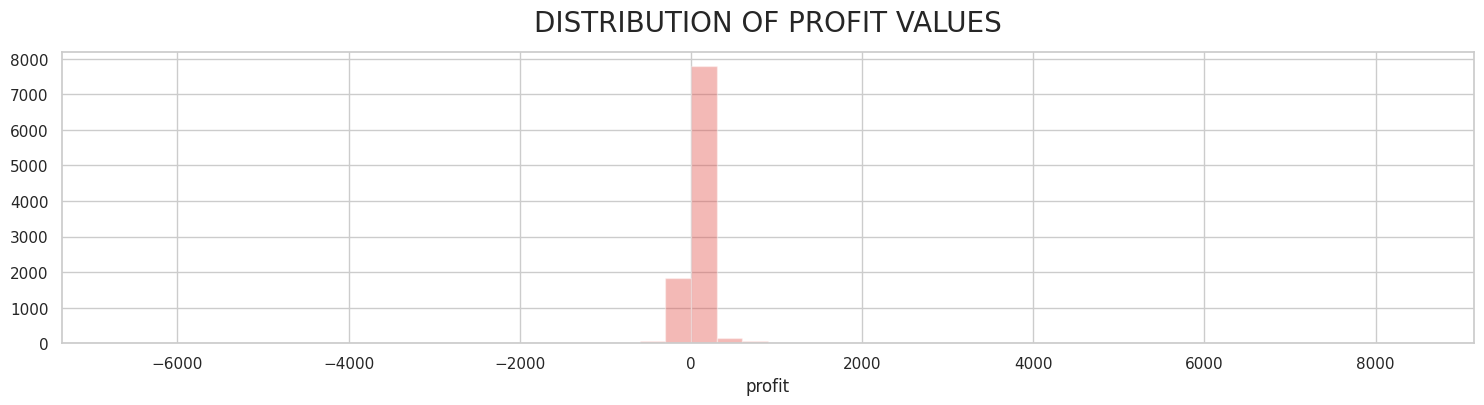

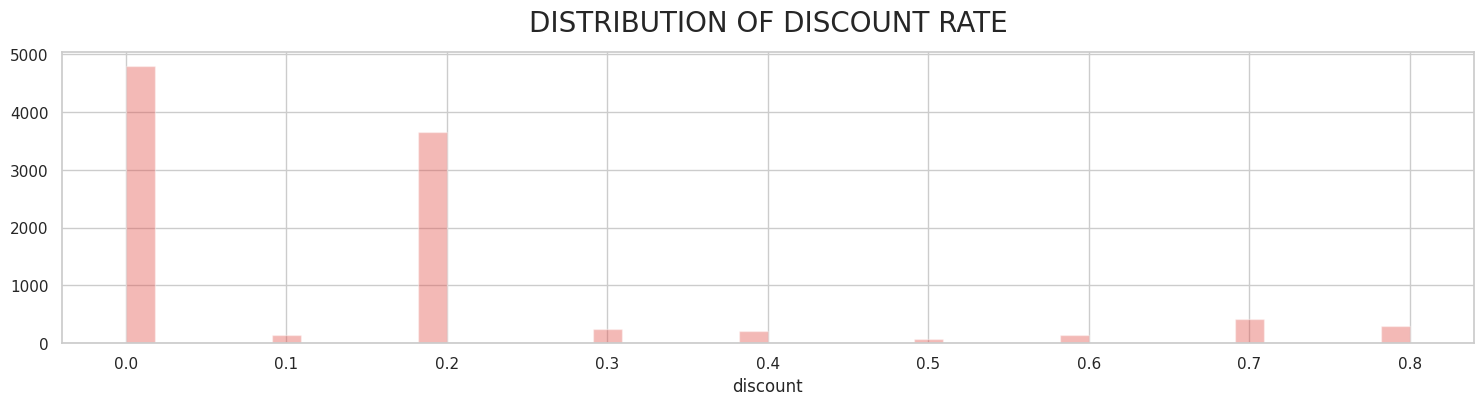

In [20]:
# distribution of profit
plt.figure(figsize=(15, wide(15)/2))
plt.title('DISTRIBUTION OF PROFIT VALUES', fontsize=20, pad=15)
sns.distplot(df['profit'], kde=False, hist=True)

plt.tight_layout()
plt.show()

# distribution of discount rate
plt.figure(figsize=(15, wide(15)/2))
plt.title('DISTRIBUTION OF DISCOUNT RATE', fontsize=20, pad=15)
sns.distplot(df['discount'], kde=False, hist=True)

plt.tight_layout()
plt.show()

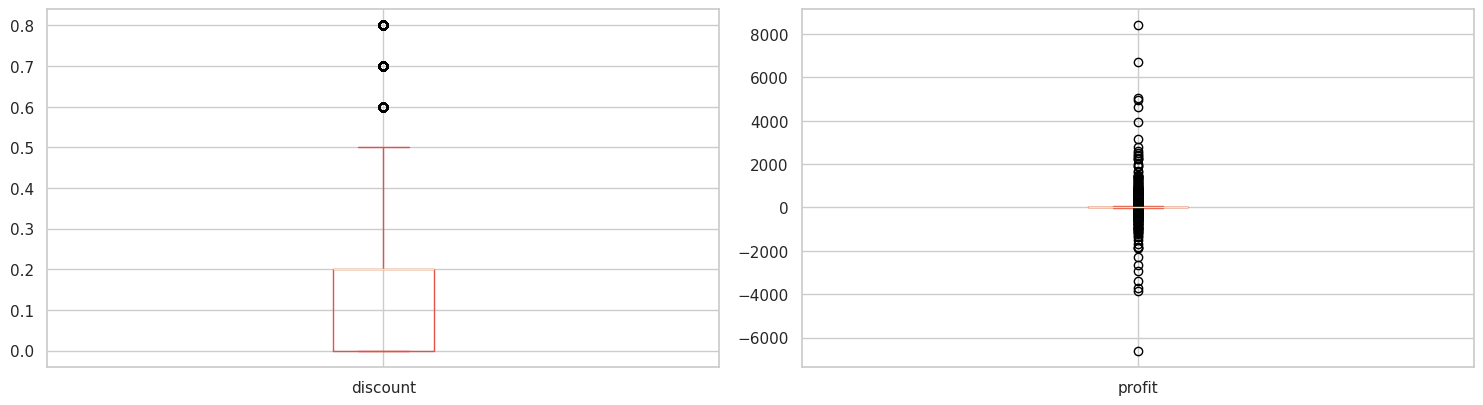

In [21]:
df.select_dtypes(include=[int, float]).drop(columns=['sales','quantity']).plot(subplots=True, kind='box', figsize=(15, wide(15)/2))

plt.tight_layout()
plt.show()

QUESTION - 3


Expert-Level Revision:

An analysis of the Profit Value Distribution and Boxplot Visualisation reveals that the data deviates from a normal distribution, with the presence of negative profit values, indicating potential anomalies or business exceptions.

Key Insight:
Following a comprehensive Data Quality Assessment, it was identified that the retail dataset contains instances of non-profitable conditions. This insight suggests a need for further investigation into underlying business drivers, such as loss-leader pricing strategies, discount policies, operational inefficiencies, or data integrity issues. Addressing these factors will be critical in refining strategic decision-making and optimising profitability



In [22]:
# create function that can return the target from the profit column
def get_target(x):
    if x > 0:
        return 1
    else:
        return 0

In [23]:
# applying the get_target function
df['target'] = df.profit.apply(lambda x: get_target(x))

Analise : Target by Discount

The first insight by looking at the profit target or not based on the discount range given.

In [24]:
eda3 = df.copy()

Analise : Target by Ship Mode

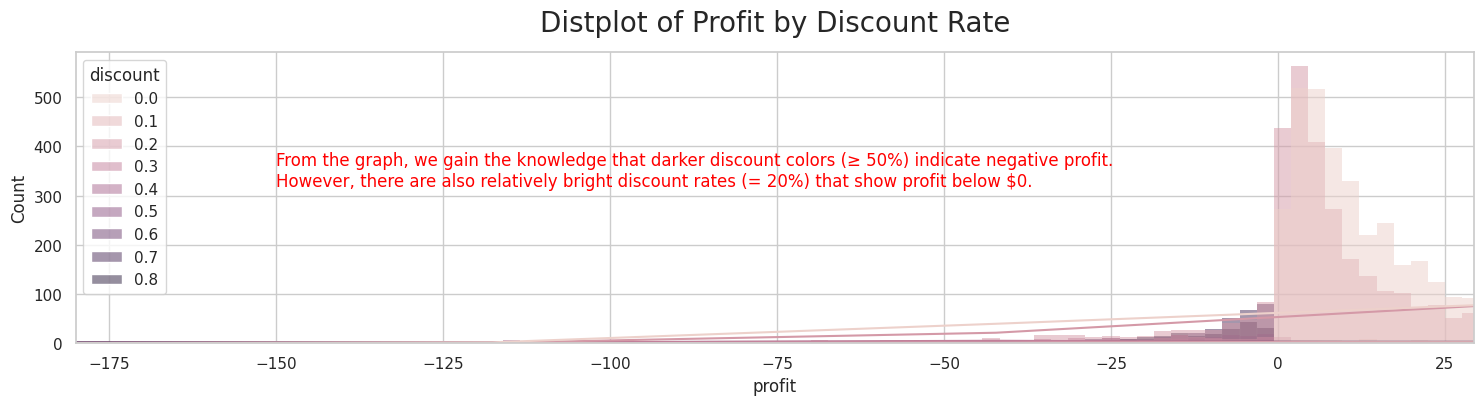

In [25]:
plt.figure(figsize=(15, wide(15)/2))
plt.title('Distplot of Profit by Discount Rate', fontsize=20, pad=15)
sns.histplot(eda3, x='profit', kde=True, hue='discount')

plt.xlim(xmax=eda3.profit.quantile(0.75), xmin=-180)

plt.annotate('From the graph, we gain the knowledge that darker discount colors (≥ 50%) indicate negative profit.\nHowever, there are also relatively bright discount rates (= 20%) that show profit below $0.',
            xy = (-150, 320), color='red')

plt.tight_layout()
plt.show()


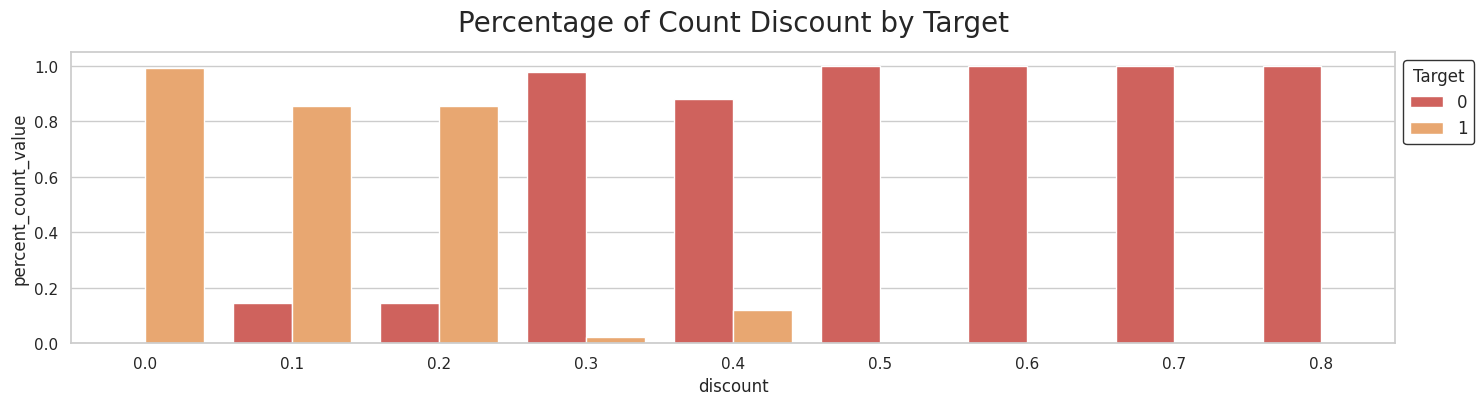

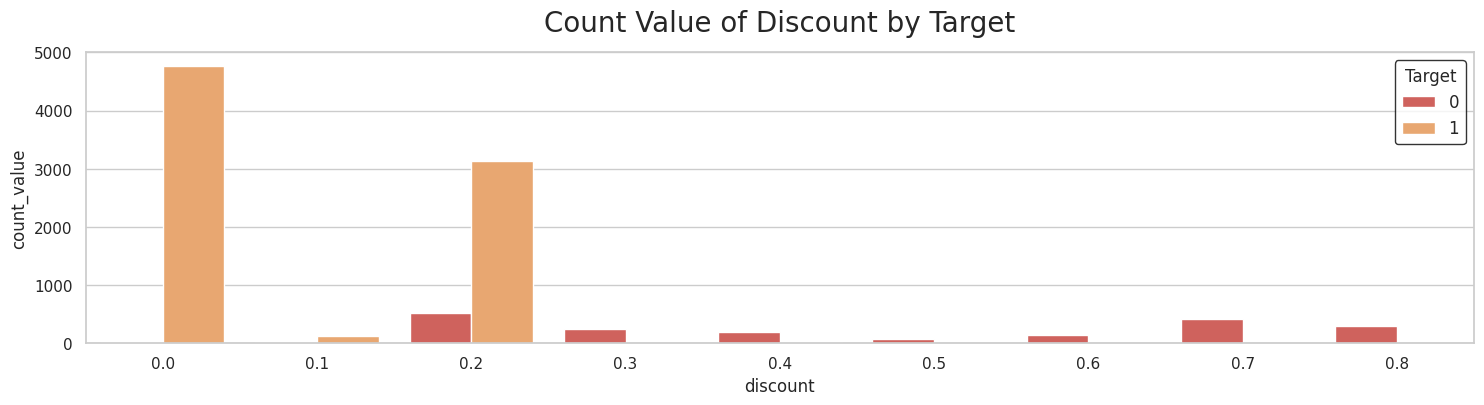

In [26]:
# data wrangling
eda3 = df.copy()
eda3_ = []
for x in eda3.discount.unique():
    data=eda3[eda3.discount == x]
    data=data.value_counts(['target']).reset_index()
    data['discount']=x
    data.columns=['target','count_value','discount']
    data['percent_count_value']=data.count_value/data.count_value.sum()
    eda3_.append(data[['discount','target','count_value','percent_count_value']])

eda3 = pd.concat(eda3_, axis=0)
eda3.sort_values(['discount','target'], ascending=True, inplace=True)

## Data Visualize
# percentage of count value discount by target
plt.figure(figsize=(15, wide(15)/2))
plt.title('Percentage of Count Discount by Target', fontsize=20, pad=15)
sns.barplot(eda3, x='discount', hue='target', y='percent_count_value')

plt.legend(title='Target', edgecolor='black', fontsize=12, bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

# count value of discount by target
plt.figure(figsize=(15, wide(15)/2))
plt.title('Count Value of Discount by Target', fontsize=20, pad=15)
sns.barplot(eda3, x='discount', hue='target', y='count_value')

plt.legend(title='Target', edgecolor='black', fontsize=12, bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

 Target by Ship Mode

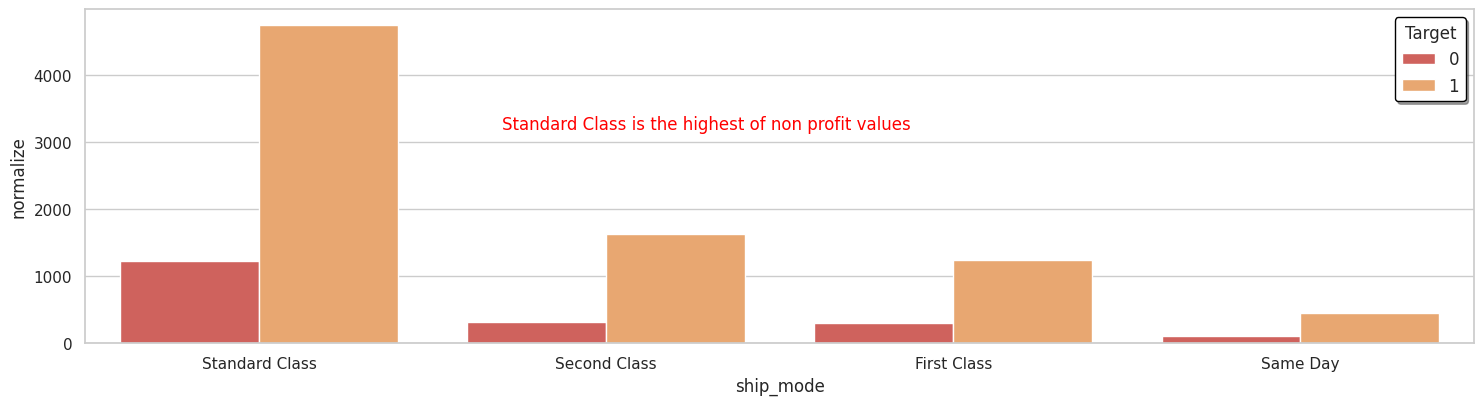

In [27]:
# analize target by ship_mode
eda1 = []
for x in df.target.unique():
    data = df[df.target==x]
    data = data.value_counts(['ship_mode']).reset_index()
    data['target']=x
    data.columns=['ship_mode','normalize','target']
    eda1.append(data[['target','ship_mode','normalize']])

eda1 = pd.concat(eda1, axis=0)

# visualize
plt.figure(figsize=(15, wide(15)/2))
sns.barplot(eda1, x='ship_mode', hue='target', y='normalize')
plt.annotate('Standard Class is the highest of non profit values', xy=(0.7, 3200), color='red')
plt.legend(title ='Target', fontsize=12, shadow=True, edgecolor='black')

plt.tight_layout()
plt.show()

Discount by Ship Mode

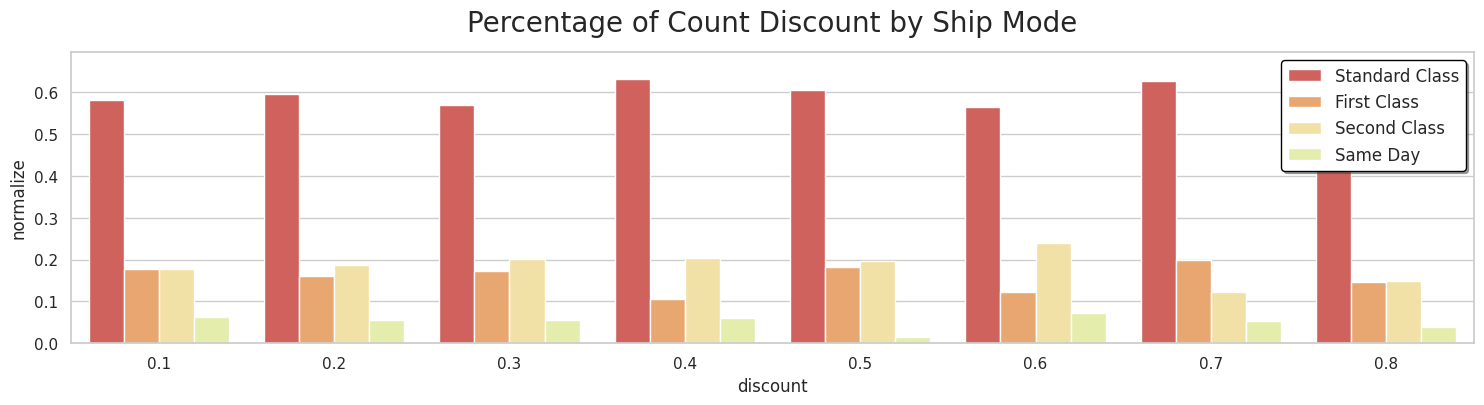

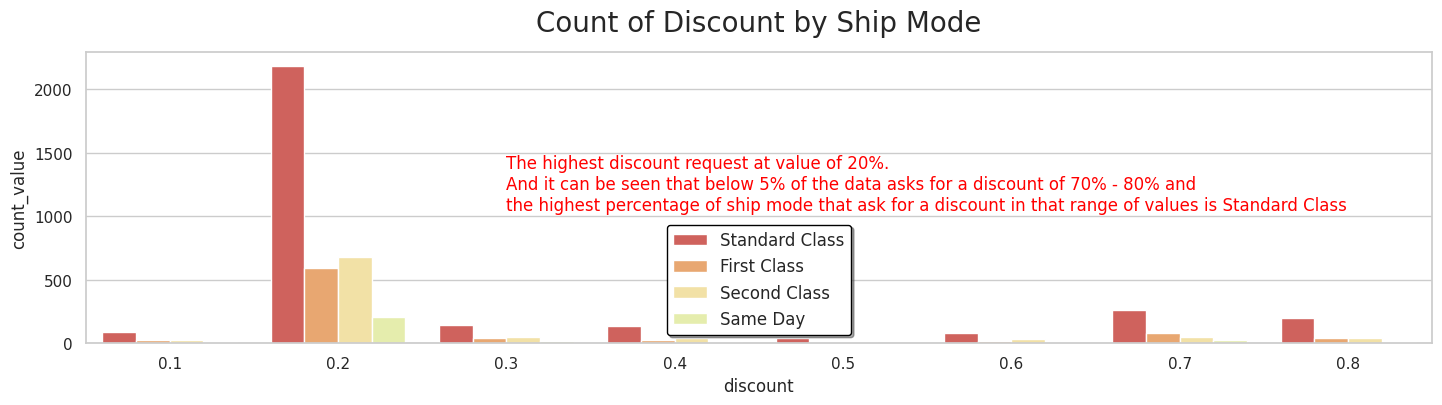

In [28]:
# analize ship_mode by discount rate
eda2 = df.copy()
eda2_ = []
for x in df.discount.unique():
    data=eda2[eda2.discount==x]
    data=data.value_counts('ship_mode').reset_index()
    data['discount']=x
    data.columns=['ship_mode','count_value','discount']
    data['normalize']=data.count_value/data.count_value.sum()
    eda2_.append(data[['ship_mode','discount','count_value','normalize']])
eda2=pd.concat(eda2_, axis=0)
eda2=eda2[eda2.discount != 0]

# visualize percentage of count discount by ship mode
plt.figure(figsize=(15, wide(15)/2))
plt.title('Percentage of Count Discount by Ship Mode', fontsize=20, pad=15)
sns.barplot(eda2, x='discount', hue='ship_mode', y='normalize')
plt.legend(fontsize=12, edgecolor='black', shadow=True)
plt.tight_layout()
plt.show()

# visualize count of discount by ship mode
plt.figure(figsize=(15, wide(15)/2))
plt.title('Count of Discount by Ship Mode', fontsize=20, pad=15)
sns.barplot(eda2, x='discount', hue='ship_mode', y='count_value')
plt.annotate('The highest discount request at value of 20%.\nAnd it can be seen that below 5% of the data asks for a discount of 70% - 80% and\nthe highest percentage of ship mode that ask for a discount in that range of values is Standard Class',
            xy = (2, 1050), color='red')
plt.legend(fontsize=12, edgecolor='black', shadow=True)
plt.tight_layout()
plt.show()

Profit by Segment¶

In [29]:
# First, we remove outlier data to facilitate the observation of profit differences across customer segments.
q1 = df.profit.quantile(0.25)
q3 = df.profit.quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
high = q3 + (1.5 * iqr)

eda = df[(df.profit >= low) & (df.profit <= high)]

segment
Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: proportion, dtype: float64


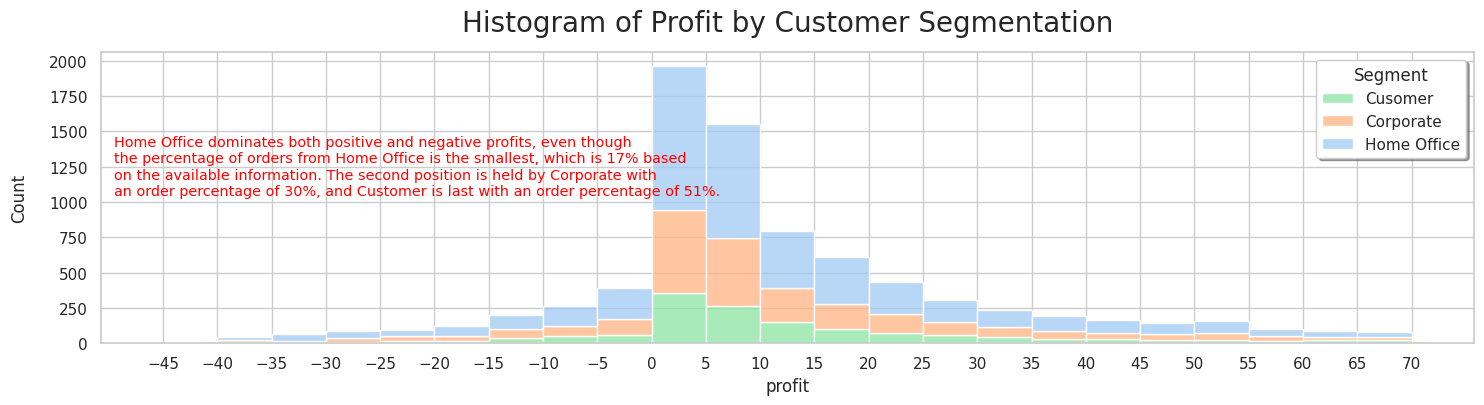

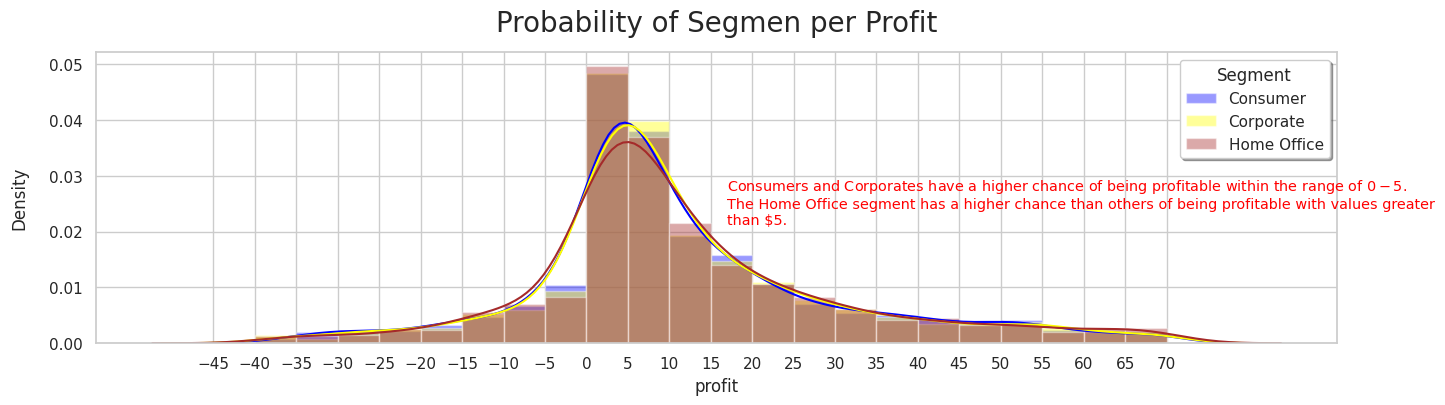

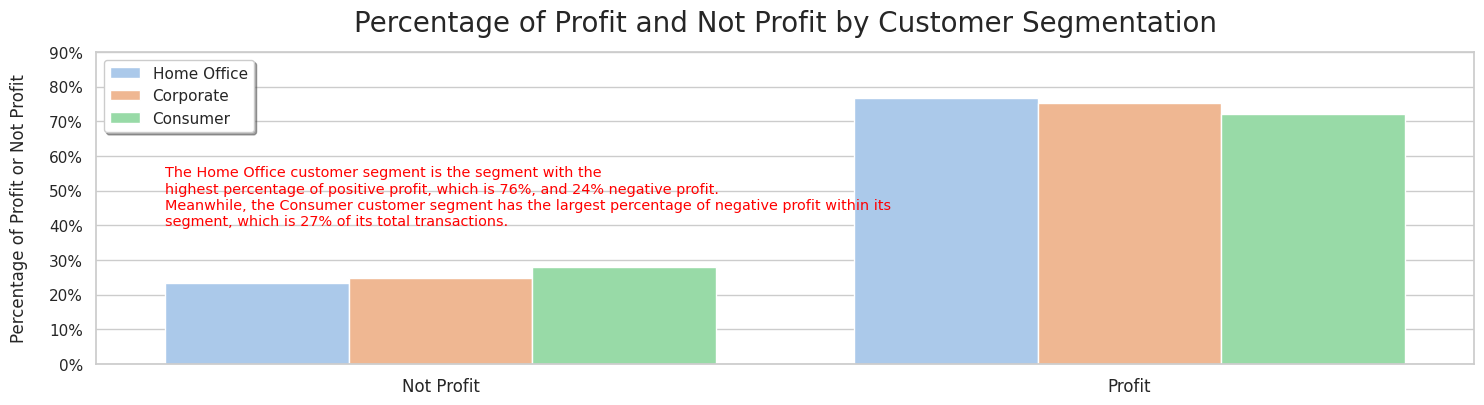

In [30]:
# show percentage of count order by segment
print(df.value_counts('segment', normalize=True))

# create bins
bins_ = np.arange(-45, 75, 5)

# histogram visualization
plt.figure(figsize=(15, wide(15)/2))
plt.title('Histogram of Profit by Customer Segmentation', fontsize=20, pad=15)
sns.histplot(eda, x='profit', hue='segment', palette='pastel', kde=False, multiple='stack', bins=bins_)
plt.legend(['Cusomer','Corporate','Home Office'], title='Segment', shadow=True)
plt.ylabel('Count', labelpad=15)
plt.xticks(bins_)
plt.annotate('Home Office dominates both positive and negative profits, even though\nthe percentage of orders from Home Office is the smallest, which is 17% based\non the available information. The second position is held by Corporate with\nan order percentage of 30%, and Customer is last with an order percentage of 51%.',
            xy = (-49.5, 1050), color='red', fontsize=10.4)
plt.tight_layout()
plt.show()

# distplot visualization
plt.figure(figsize=(15, wide(15)/2))
plt.title('Probability of Segmen per Profit', fontsize=20, pad=15)
sns.distplot(eda.profit[eda.segment=='Consumer'], bins=bins_ , color='blue', label='Consumer')
sns.distplot(eda.profit[eda.segment=='Corporate'], bins=bins_, color='yellow', label='Corporate')
sns.distplot(eda.profit[eda.segment=='Home Office'], bins=bins_, color='brown', label='Home Office')
plt.legend(title='Segment', shadow=True)
plt.xticks(bins_)
plt.ylabel('Density', labelpad=15)
plt.annotate('Consumers and Corporates have a higher chance of being profitable within the range of $0 - $5.\nThe Home Office segment has a higher chance than others of being profitable with values greater\nthan $5.',
            xy = (17, 0.02125), color='red', fontsize=10.4)
plt.tight_layout()
plt.show()

# data wrangling for get a percentage of profit or not by customer segmentation
eda = df.groupby(['segment','target'])[['profit']].sum().reset_index()
eda_ = []
for x in ['Home Office','Corporate','Consumer']:
    data=eda[eda.segment==x]
    data['profit_abs'] = abs(data.profit)
    data['percentage_profit'] = (data.profit_abs/data.profit_abs.sum())*100
    data.drop(columns=['profit_abs'], inplace=True)
    eda_.append(data)
eda = pd.concat(eda_, axis=0)

# Visualize of percentage profit or not
plt.figure(figsize=(15, wide(15)/2))
plt.title('Percentage of Profit and Not Profit by Customer Segmentation', fontsize=20, pad=15)
sns.barplot(eda, x='target', y='percentage_profit', hue='segment', palette='pastel')
plt.legend( shadow=True)
plt.xlabel('')
plt.xticks([0, 1], ['Not Profit','Profit'], fontsize=12)
plt.ylabel('Percentage of Profit or Not Profit', fontsize=12, labelpad=15)
label, location = plt.yticks()
plt.yticks(label, [str(int(x)) + '%' for x in label])
plt.annotate('The Home Office customer segment is the segment with the\nhighest percentage of positive profit, which is 76%, and 24% negative profit.\nMeanwhile, the Consumer customer segment has the largest percentage of negative profit within its\nsegment, which is 27% of its total transactions.',
            xy = (-0.4, 40), color='red', fontsize=10.4)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

###
# create the data as bellow more easier
# Consumer = [...]
# Corporate = [...]
# Home_Office = [...]

# data = [Consumer, Corporate, Home_Office]
###

data = [df.profit[df.segment==x] for x in df.segment.unique()]

# Using ANOVA for get F-value and p-value
f_value, p_value = f_oneway(*data)

# Print output
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 0.8980668323003199
p-value: 0.4073892685202365


Statistical Insight:


The F-value (0.89) and P-value (0.4) indicate that customer segment does not have a statistically significant impact on profitability within the available dataset. Given that the P-value exceeds the conventional significance threshold (0.05), we fail to reject the null hypothesis, suggesting that variations in customer segments do not meaningfully influence profit or non-profit outcomes.

This insight underscores the need for further analysis, such as interaction effects, pricing strategies, or external market factors, to identify more influential drivers of profitability.